In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.neural_network import MLPClassifier 
from dmba import classificationSummary
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
Amazon = pd.read_csv('Amazon2018.csv')
Amazon.head()

C:\Users\Anjal\AppData\Local\Temp\ipykernel_14824\2189621058.py:1: DtypeWarning: Columns (9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  Amazon = pd.read_csv('Amazon2018.csv')


,AMZN_YR_WK,Department,VendorName,Purchase Order,DC,Original Delivery Date,Actual Delivery Date,Gate Time,Ordercases,Rcvd Cases,Non Compliant Qty,Compliant %,Status
0,11828,85,KODAK ALARIS OPERATIONS CANADA,6250080999,6002,8/6/2018,7/9/2018,8:56:04 AM,1719,0,1719,0,0
1,11828,85,KODAK ALARIS OPERATIONS CANADA,6350090995,6063,8/6/2018,7/11/2018,7:42:51 PM,1273,0,1273,0,0
2,11828,85,KODAK ALARIS OPERATIONS CANADA,6450090985,6093,8/6/2018,7/12/2018,10:55:39 AM,897,0,897,0,0
3,11828,72,APPLE CANADA INC,8450361239,6063,8/9/2018,7/27/2018,7:02:56 AM,772,0,772,0,0
4,11828,98,TREASURE MILLS INC.,3300401778,6098,8/5/2018,7/29/2018,1:19:54 PM,572,0,572,0,0


In [3]:
Amazon = Amazon.rename(columns={'Status': 'Fulfillment Status'})
Amazon

,AMZN_YR_WK,Department,VendorName,Purchase Order,DC,Original Delivery Date,Actual Delivery Date,Gate Time,Ordercases,Rcvd Cases,Non Compliant Qty,Compliant %,Fulfillment Status
0,11828,85,KODAK ALARIS OPERATIONS CANADA,6250080999,6002,8/6/2018,7/9/2018,8:56:04 AM,1719,0,1719,0,0
1,11828,85,KODAK ALARIS OPERATIONS CANADA,6350090995,6063,8/6/2018,7/11/2018,7:42:51 PM,1273,0,1273,0,0
2,11828,85,KODAK ALARIS OPERATIONS CANADA,6450090985,6093,8/6/2018,7/12/2018,10:55:39 AM,897,0,897,0,0
3,11828,72,APPLE CANADA INC,8450361239,6063,8/9/2018,7/27/2018,7:02:56 AM,772,0,772,0,0
4,11828,98,TREASURE MILLS INC.,3300401778,6098,8/5/2018,7/29/2018,1:19:54 PM,572,0,572,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196793,11849,72,LEXAR INTERNATIONAL,8100365713,6063,12/31/2018,2/4/2019,9:44:00 AM,128,0,128,0,0
196794,11849,72,LEXAR INTERNATIONAL,8250365644,6093,12/29/2018,2/6/2019,4:55:58 AM,148,0,148,0,0
196795,11849,6,LEXAR INTERNATIONAL,650371602,6093,12/29/2018,2/6/2019,4:55:58 AM,211,0,211,0,0
196796,11849,16,JAY TRENDS MERCHANDISING INC.,450431790,6093,12/29/2018,2/13/2019,9:46:12 PM,34,0,34,0,0


In [4]:
print(Amazon.shape)

(196798, 13)


In [5]:
Amazon.describe()

,AMZN_YR_WK,Department,Purchase Order,DC,Ordercases,Non Compliant Qty,Fulfillment Status
count,196798.000000,196798.000000,1.967980e+05,196798.000000,196798.000000,196798.000000,196798.000000
mean,11838.440101,51.623863,5.005616e+09,6209.740150,780.398663,348.116637,0.368672
std,5.985471,39.545733,2.804272e+09,359.675785,1164.203380,847.121507,0.482446
min,11828.000000,1.000000,2.265990e+07,6002.000000,0.000000,-4455.000000,0.000000
25%,11833.000000,11.000000,2.850471e+09,6063.000000,96.000000,0.000000,0.000000
50%,11839.000000,46.000000,4.650416e+09,6081.000000,344.000000,30.000000,0.000000
75%,11844.000000,92.000000,7.900328e+09,6097.000000,1050.000000,294.000000,1.000000
max,11849.000000,99.000000,9.950401e+09,7088.000000,62409.000000,62409.000000,1.000000


In [6]:
Amazon.isna().sum()

AMZN_YR_WK                0
Department                0
VendorName                0
Purchase Order            0
DC                        0
Original Delivery Date    0
Actual Delivery Date      0
Gate Time                 0
Ordercases                0
Rcvd Cases                0
Non Compliant Qty         0
Compliant  %              0
Fulfillment Status        0
dtype: int64

In [7]:
Amazon.dtypes

AMZN_YR_WK                 int64
Department                 int64
VendorName                object
Purchase Order             int64
DC                         int64
Original Delivery Date    object
Actual Delivery Date      object
Gate Time                 object
Ordercases                 int64
Rcvd Cases                object
Non Compliant Qty          int64
Compliant  %              object
Fulfillment Status         int64
dtype: object

In [8]:
from datetime import datetime

Amazon['Original Delivery Date'] = pd.to_datetime(Amazon['Original Delivery Date'])
Amazon['Actual Delivery Date'] = pd.to_datetime(Amazon['Actual Delivery Date'])

In [9]:
Amazon.dtypes

AMZN_YR_WK                         int64
Department                         int64
VendorName                        object
Purchase Order                     int64
DC                                 int64
Original Delivery Date    datetime64[ns]
Actual Delivery Date      datetime64[ns]
Gate Time                         object
Ordercases                         int64
Rcvd Cases                        object
Non Compliant Qty                  int64
Compliant  %                      object
Fulfillment Status                 int64
dtype: object

In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
Amazon['VendorName'] = label_encoder.fit_transform(Amazon['VendorName'])

In [11]:
Amazon['Rcvd Cases'] = Amazon['Rcvd Cases'].astype(str)
Amazon['Rcvd Cases'] = Amazon['Rcvd Cases'].str.replace(',', '')

In [12]:
Amazon = Amazon.drop(Amazon[Amazon['Compliant  %'] == '#DIV/0!'].index)

In [13]:
Amazon['Compliant  %'] = Amazon['Compliant  %'].astype(float)

In [14]:
Amazon.dtypes

AMZN_YR_WK                         int64
Department                         int64
VendorName                         int32
Purchase Order                     int64
DC                                 int64
Original Delivery Date    datetime64[ns]
Actual Delivery Date      datetime64[ns]
Gate Time                         object
Ordercases                         int64
Rcvd Cases                        object
Non Compliant Qty                  int64
Compliant  %                     float64
Fulfillment Status                 int64
dtype: object

In [15]:
Amazon['Difference in Delivery Days'] = (Amazon['Actual Delivery Date'] - Amazon['Original Delivery Date']).dt.days
Amazon

,AMZN_YR_WK,Department,VendorName,Purchase Order,DC,Original Delivery Date,Actual Delivery Date,Gate Time,Ordercases,Rcvd Cases,Non Compliant Qty,Compliant %,Fulfillment Status,Difference in Delivery Days
0,11828,85,697,6250080999,6002,2018-08-06,2018-07-09,8:56:04 AM,1719,0,1719,0.0,0,-28
1,11828,85,697,6350090995,6063,2018-08-06,2018-07-11,7:42:51 PM,1273,0,1273,0.0,0,-26
2,11828,85,697,6450090985,6093,2018-08-06,2018-07-12,10:55:39 AM,897,0,897,0.0,0,-25
3,11828,72,99,8450361239,6063,2018-08-09,2018-07-27,7:02:56 AM,772,0,772,0.0,0,-13
4,11828,98,1281,3300401778,6098,2018-08-05,2018-07-29,1:19:54 PM,572,0,572,0.0,0,-7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196793,11849,72,761,8100365713,6063,2018-12-31,2019-02-04,9:44:00 AM,128,0,128,0.0,0,35
196794,11849,72,761,8250365644,6093,2018-12-29,2019-02-06,4:55:58 AM,148,0,148,0.0,0,39
196795,11849,6,761,650371602,6093,2018-12-29,2019-02-06,4:55:58 AM,211,0,211,0.0,0,39
196796,11849,16,645,450431790,6093,2018-12-29,2019-02-13,9:46:12 PM,34,0,34,0.0,0,46


In [16]:
outcome = 'Fulfillment Status'
predictors = ['Difference in Delivery Days','Non Compliant Qty','VendorName','Ordercases','Compliant  %']

X = Amazon[predictors]
y = Amazon[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=0)

In [17]:
# train neural network with 2 hidden nodes 
clf = MLPClassifier(hidden_layer_sizes=(4), activation='logistic', solver='lbfgs',random_state=1)
clf.fit(train_X, train_y.values)

D:\python\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', hidden_layer_sizes=4, random_state=1,
              solver='lbfgs')

In [18]:
clf.predict(X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [19]:
#Network structure
print('Weights')
print(clf.coefs_)

Weights
[array([[-7.90580804e-02, -4.75064736e+01, -4.76955684e-01,
         2.83991599e-01],
       [-2.92824654e-01, -2.07043019e+02, -2.93232422e-01,
         1.86625132e+00],
       [-5.27360396e-01, -1.05453427e-01,  4.03281675e-03,
         1.17935888e+02],
       [-8.16228164e-01,  4.47482222e-03, -4.43013116e-01,
         1.51933389e+02],
       [ 7.71858958e-02,  1.73733340e+00, -3.39033211e-01,
         3.23844697e+01]]), array([[ -0.89085247],
       [136.80665815],
       [ -1.27188582],
       [-59.23079174]])]


In [20]:
# training performance
classificationSummary(train_y, clf.predict(train_X))

Confusion Matrix (Accuracy 0.9891)

       Prediction
Actual     0     1
     0 73285  1288
     1     0 43505


In [21]:
# validation performance
classificationSummary(valid_y, clf.predict(valid_X))

Confusion Matrix (Accuracy 0.9892)

       Prediction
Actual     0     1
     0 48820   850
     1     0 29049


In [22]:
#pip install mlxtend 

In [23]:
# Imports
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np



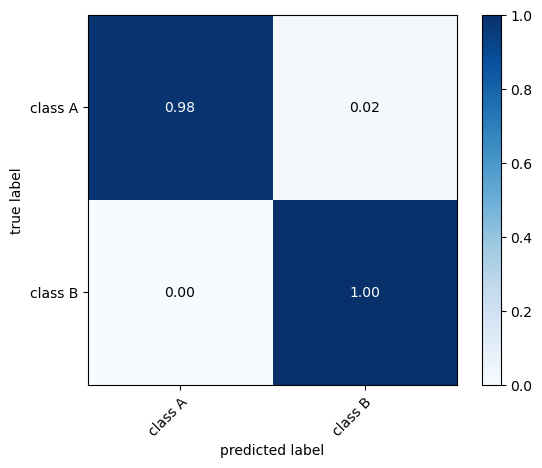

In [24]:
# Your Confusion Matrix
cm = np.array([[48820, 850],
               [0, 29049]])

# Classes
classes = ['class A', 'class B']

figure, ax = plot_confusion_matrix(conf_mat = cm,
                                   class_names = classes,
                                   show_absolute = False,
                                   show_normed = True,
                                   colorbar = True)

plt.show()